# Slinger
## General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:**  
**Title of the experiment:**  
**Starting date:**  
**Expected enddate:**  
**Partner:**  
**Goal of the experiment:**  
**Research question:**  
**Expectations or Hypothesis:**  
**Desired accuracy:**  




In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 

## Preparation
 


**Assignments:**  

**Method:**  

Om de lengte L te meten wordt er gebruik gemaakt van de meetlat van een meter, verder wordt de diameter van het gewichtje gemeten met een schuifmaat, deze waarde wordt gedeeld door 2 om de afstand tot het midden te bepalen
Verder wordt nog het oor van het gewicht gemeten en de diepte van het gat waar de draad aan de bovenkant vastzit, allebei ook met de schuifmaat gemeten. 
Al deze meetwaarde worden bij elkaar opgeteld om de lengte van de slinger te bepalen. 
De onzekerheid wordt berekend door de onzekerheden van de meetapparatuur kwadratisch bij elkaar op te tellen en hiervan de wortel te nemen
Voor het meten van de periode van de slinger wordt gebruik gemaakt van arduino, deze meet wanneer het gewichtje door de evenwichtstand beweegt.
In dit experiment wordt de tijd bepaald van 1 periode, dit wordt 20 keer herhaald en het gemiddelde van de gemeten periodes wordt gebruikt. Dus het gewichtje moet 3 keer door de evenwichtsstand bewegen en de tijd start vanaf de eerste keer dat dit gebeurd.
Uiteindelijk worden de gevonden waarden in de formule g = ((4*pi^2)*L)/T^2 gezet, met L de lengte van het draad, T de periode en g de zwaartekrachtsversnelling. Hiermee wordt berekend wat de zwaartekrachtsversnelling is.
De massa van het visdraad waar het gewichtje aan vastzit is verwaarloosbaar en het gewicht wordt beschouwd als een puntmassa.

**Theory:** 

Volgens de theorie zou een fysische slinger, bestaande uit een puntmassa aan een massaloze draad, zie {numref}`Figuur {number} <fig:gbep:sling>`, een periode hebben van:

$$ T = 2\pi\sqrt{\frac{l}{g}}$$

Deze formule is af te leiden van de formule van het moment: tau = -mgLsin(theta) , het traagheidsmoment: I = mL^2 , en Newton’s rotatiewet: I(theta’’) = tau
Door deze in te vullen en te vereenvoudigen vinden we theta’’ + sin(theta)*g / L = 0.
Omdat bij kleine hoeken sin(theta) ongeveer gelijk is aan theta, leidt dit tot:
theta’’ + theta*g / L = 0 , wat de differentiaalvergelijking van onze pendulum is. 

Deze formule is alleen geldig als de volgende punten voldaan worden:
Kleine uitwijkingshoek sinθ≈θ 
Puntmassa aan een massaloze, niet-rekkende draad.
Geen luchtweerstand of wrijving in het ophangpunt.

De lengte die in de formule gebruikt is te vinden door de lengte van het ophangpunt tot de top van de bol, toe te voegen aan de helft van de diameter van de bol.

Wanneer de lengte van de slinger bekend is en de periode bepaald, volgt uit bovenstaande vergelijking de waarde voor de zwaartekrachtsversnelling.

```{figure} Figures/G/Slinger.png
---
width: 15%
name: fig:gbep:sling
---
De opstelling van de fysische slinger.
```

**Independent variable:**  
**Dependent variable:**  
**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  


## Execution

In [32]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!
# De gemeten waardes van de Lengtes bij elkaar optellen
L= (0.614+1.07+125+1.275)/100 #m

# En de gemeten periodes dmv arduino
T= np.array([2.269220,2.268848,2.268724,2.269164,2.269112,2.270492,2.270784, 2.269664,2.269068,2.269124,2.269052,2.268804,2.269524,2.269108, 2.270444])
T_avg= np.mean(T)
print(T_avg)

#2.272868, 2.273672, 2.273608,2.273744,2.272540,2.271072,2.272012,2.270036,2.273644,2.270492,2.270796,2.270788,2.270444,2.272876,2.272648,2.273148

2.2694088


**Observations:**  
**Notes:**  

## Processing
**Description of processing of raw data into scientific evidence:**


Text(0, 0.5, '$g$  (m/s^2)')

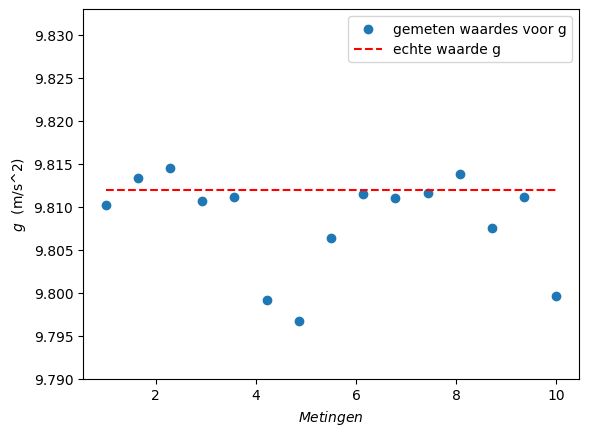

In [57]:
#Data processing and analysis:
def func_g(T,L):
    return (((2*np.pi)**2*L)/T**2)
g= func_g(T_avg,L)
y=func_g(T,L)
x=np.linspace(1,10,15)
y_g = np.full_like(x, 9.812)   # constante y = g om per gemeten punt te vergelijken met echte waarde.
plt.scatter(x,y, label= "gemeten waardes voor g")
plt.ylim(9.79,9.833)
plt.plot(x,y_g, 'r--', label= "echte waarde g")
plt.legend()
plt.xlabel("$Metingen$")
plt.ylabel("$g$  (m/s^2)")

In [ ]:
#Data processing and analysis:


In [ ]:
#Data processing and analysis:


**Describing the pattern in the processed data:**  


In [68]:
#Calculations of e.a. measurement uncertainties, and providing final answers.
#onzekerheid van meetstaaf en meetlint
unc_mtsf= 0.02/1000 #m
unc_mtlt = 0.5/1000 #m

# De meetstaaf heeft 3 lengtes gemeten en de meetlat een, dus wordt de onzekerheid van de meetstaaf 3 keer genomen
unc_L = np.sqrt(3*unc_mtsf**2+unc_mtlt**2)
unc_g=np.sqrt(((func_g(T_avg,L+unc_L)-func_g(T_avg,L-unc_L))/2)**2)

print(f"In dit experiment is g bepaald als {g:.4f}, +/-, {unc_g:.4f}, [m/s^2]" )
print("De waarde van g die in Delft wordt gebruikt, met 0.5% foutmarge, valt tussen 9.7629 en 9.8611 [m/s^2], dus komt onze gevonden waarde overeen met de gegeven theoretische waarde.")

In dit experiment is g bepaald als 9.8086, +/-, 0.0038, [m/s^2]
De waarde van g die in Delft wordt gebruikt, met 0.5% foutmarge, valt tussen 9.7629 en 9.8611 [m/s^2], dus komt onze gevonden waarde overeen met de gegeven theoretische waarde.


**Notes:**  

## Discussion



## Conclusion

## Additional notes, remarks, explanations, thoughts etc